In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import json
main_path = os.path.dirname(os.path.abspath("__file__"))
print(main_path)
figure_path = os.path.join(main_path, "figs")
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

result_dict = {}

d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Poisson_DirichletBC


In [3]:
def get_loss_curve(task_name,dir_name):
    task_path = os.path.join(main_path, "Tasks",task_name)

    result_path = os.path.join(task_path, dir_name)
    with open(result_path + ".json", "r") as config_file:
        config = json.load(config_file)
        print(config)
    time = []
    error = []
    for result_file in os.listdir(result_path):
        if not result_file.endswith(".txt"):
            continue
        loss_curve = np.loadtxt(os.path.join(result_path, result_file))
        time.append(loss_curve[:,0])
        error.append(loss_curve[:,-1])

    time = np.array(time).mean(axis=0)
    error = np.array(error)
    x = time
    y = np.mean(error,axis=0)
    y1 = np.min(error,axis=0)
    y2 = np.max(error,axis=0)
    res_dict = {"x":x,"y":y,"y1":y1,"y2":y2}
    return res_dict

def get_lambda_curve(task_name):
    task_path = os.path.join(main_path, "Tasks",task_name)
    lambda_list = []
    error_list = []
    for dir_name in os.listdir(task_path):
        if dir_name.endswith(".json"):
            continue
        result_path = os.path.join(task_path, dir_name)
        with open(result_path + ".json", "r") as config_file:
            config = json.load(config_file)
            lambda_list.append(config["loss"]["lambda"])
        time = []
        error = []
        for result_file in os.listdir(result_path):
            if not result_file.endswith(".txt"):
                continue
            loss_curve = np.loadtxt(os.path.join(result_path, result_file))
            error.append(loss_curve[-1,-1])
        error_list.append([np.mean(error),np.min(error),np.max(error)])

    lambda_list = np.array(lambda_list)
    error_list = np.array(error_list)[np.argsort(lambda_list)]
    lambda_list = lambda_list[np.argsort(lambda_list)]

    x = lambda_list
    y = error_list[:,0]
    y1 = error_list[:,1]
    y2 = error_list[:,2]
    res_dict = {"x": x,"y": y,"y1": y1,"y2": y2}
    return res_dict
    

Lambda vs finial error

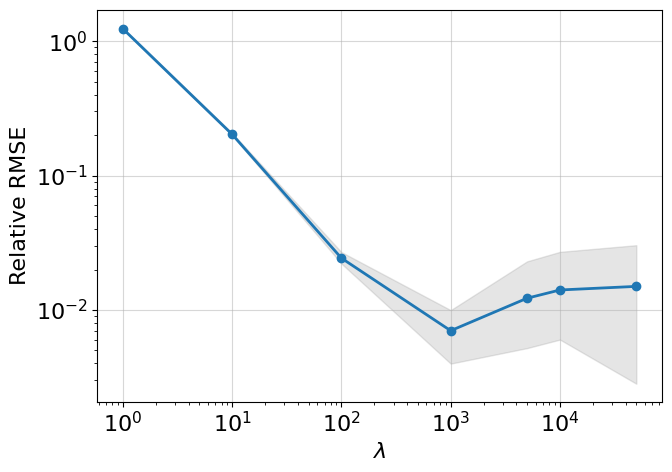

In [81]:
# task_name = "PINN_lambda_ADAM"
# task_name = "GridMLP_standard"
task_name = "PINN_energy_lambda_ADAM"
task_path = os.path.join(main_path, "Tasks",task_name)



lambda_list = []
error_list = []
for dir_name in os.listdir(task_path):
    if dir_name.endswith(".json"):
        continue
    result_path = os.path.join(task_path, dir_name)
    with open(result_path + ".json", "r") as config_file:
        config = json.load(config_file)
        lambda_list.append(config["loss"]["lambda"])
    time = []
    error = []
    for result_file in os.listdir(result_path):
        if not result_file.endswith(".txt"):
            continue
        loss_curve = np.loadtxt(os.path.join(result_path, result_file))
        # time.append(loss_curve[:,0])
        error.append(loss_curve[-1,-1])
    error_list.append([np.mean(error),np.min(error),np.max(error)])


lambda_list = np.array(lambda_list)
error_list = np.array(error_list)[np.argsort(lambda_list)]
lambda_list = lambda_list[np.argsort(lambda_list)]


fig = plt.figure(figsize=(7,5))
x = lambda_list
y = error_list[:,0]
y1 = error_list[:,1]
y2 = error_list[:,2]
result_dict[task_name] = {"x": x,"y": y,"y1": y1,"y2": y2}
plt.plot(x, y,marker="o")
plt.fill_between(x, y1, y2, 
                 color='gray', alpha=0.2)
plt.xlabel(r"$\lambda$")
plt.ylabel("Relative RMSE")
plt.yscale("log")
plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

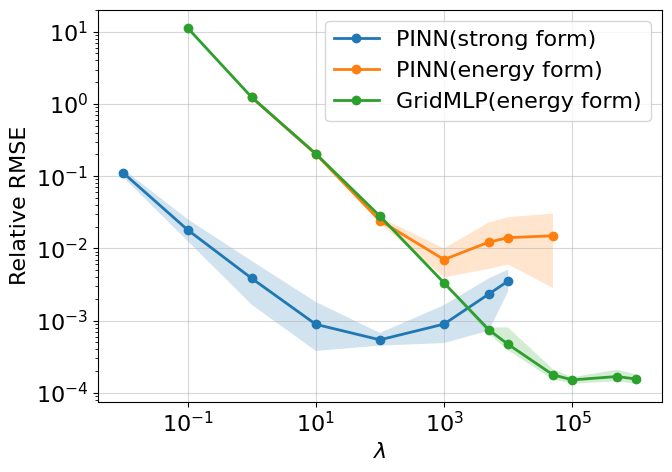

In [4]:
loss_name_list = [
    "PINN_lambda_ADAM",
    "PINN_energy_lambda_ADAM",
    "GridMLP_standard",
]
label_list = [
    
    "PINN(strong form)",
    "PINN(energy form)",
    "GridMLP(energy form)",
]

for loss_name in loss_name_list:
    loss_dict = get_lambda_curve(loss_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(7,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.2)
    i += 1
plt.xlabel(r"$\lambda$")
plt.ylabel("Relative RMSE")
plt.yscale("log")
plt.xscale("log")
plt.grid(alpha = 0.5)
plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figure_path,"lambda_error.png"), dpi=300)
plt.show()

Loss curve 

{'encoding': {'otype': 'Grid', 'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 32, 'n_hidden_layers': 1, 'spectral_norm': 1}, 'loss': {'type': 'energy', 'lambda': 1.0}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 500, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'pretrain': {'n_steps': 500, 'n_step_output': 100, 'n_step_decay': 100}, 'experiment': {'n_test': 10}}


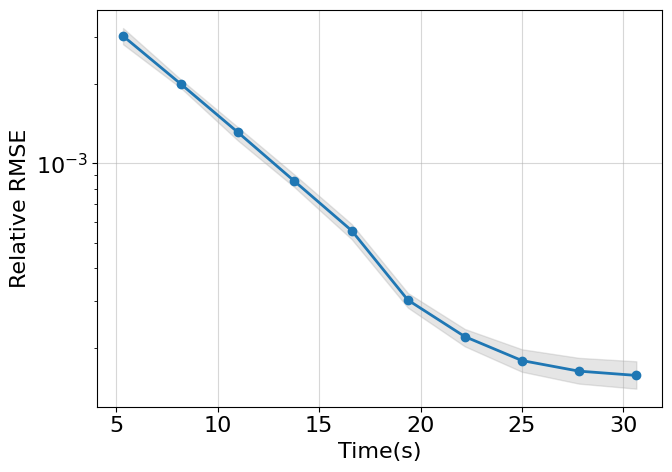

In [82]:
task_name = "GridMLP_decoupled"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'otype': 'Grid', 'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 32, 'n_hidden_layers': 1, 'spectral_norm': 1}, 'loss': {'type': 'energy', 'lambda': 100000}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 500, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'pretrain': {'n_steps': 500, 'n_step_output': 100, 'n_step_decay': 100}, 'experiment': {'n_test': 10}}


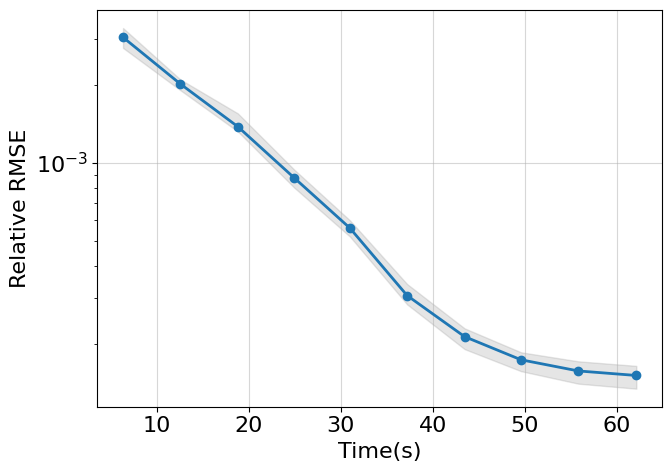

In [83]:
task_name = "GridMLP_standard"#"PINN_lambda_ADAM"

dir_name = "config_8"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

In [ ]:
task_name = "PINN_energy_lambda_ADAM"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 1000}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'experiment': {'n_test': 10}}


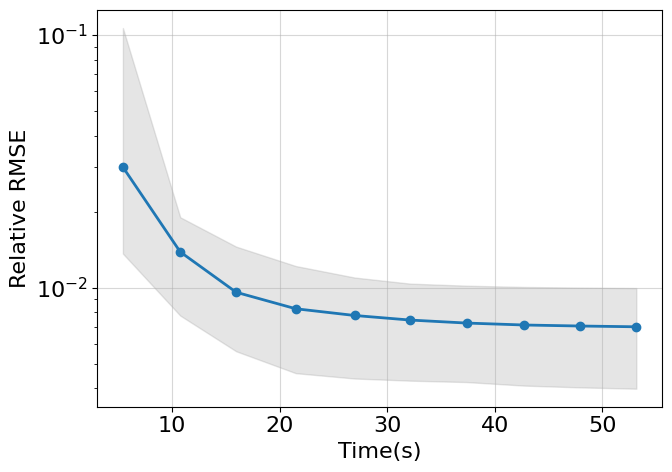

In [84]:
task_name = "PINN_energy_lambda_ADAM"

dir_name = "config_1"

loss_dict = get_loss_curve(task_name,dir_name)


fig = plt.figure(figsize=(7,5))
result_dict["{}/{}".format(task_name,dir_name)] = loss_dict
plt.plot(loss_dict["x"],loss_dict["y"] ,marker="o")
plt.fill_between(loss_dict["x"], loss_dict["y1"], loss_dict["y2"],color='gray', alpha=0.2)
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
fig.tight_layout()
plt.show()

{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 100}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_batch': 30000, 'boundary_batch': 2000, 'n_step_output': 600}, 'experiment': {'n_test': 10}}
{'encoding': {'type': 'Dense', 'n_levels': 16, 'n_features_per_level': 2, 'log2_hashmap_size': 15, 'base_resolution': 16, 'per_level_scale': 1.12, 'interpolation': 'Linear'}, 'network': {'type': 'MLP', 'activation': 'Tanh', 'n_neurons': 64, 'n_hidden_layers': 5}, 'loss': {'type': 'strong', 'lambda': 1000}, 'optimizer': {'type': 'ADAM', 'learning_rate': 0.005, 'max_iter': 0, 'n_step_decay': 800, 'gamma': 0.4}, 'training': {'n_steps': 6000, 'interior_bat

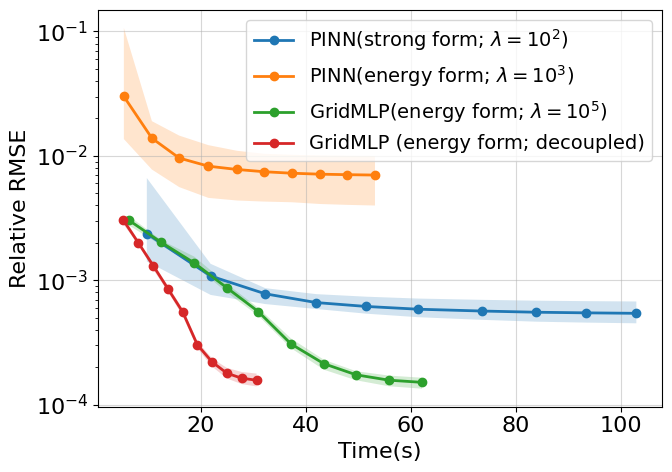

In [5]:
loss_name_list = [
"PINN_lambda_ADAM/config_4",
"PINN_energy_lambda_ADAM/config_1",
"GridMLP_standard/config_8",
"GridMLP_decoupled/config_1",

]

label_list = [

r"PINN(strong form; $\lambda = 10^{2}$)",
r"PINN(energy form; $\lambda = 10^{3}$)",
r"GridMLP(energy form; $\lambda = 10^{5}$)",
"GridMLP (energy form; decoupled)",
]

for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(7,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.2)
    i += 1
plt.xlabel("Time(s)")
plt.ylabel("Relative RMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.5)
plt.legend(fontsize=14)
fig.tight_layout()
plt.savefig(os.path.join(figure_path,"training_loss.png"), dpi=300)
plt.show()